In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle

%matplotlib inline

In [2]:
ls

Untitled.ipynb                    model_validation.py
collate_2008_on_csvs.py           modelrunner.py
combine_all_csvs.py               modelrunner.pyc
data_pc_lim_to_seatac.py          process_data_2008_on.py
dataframe_cleaner.py              scrape_transtats_airport_info.py
download_data_2008_on.py          sep2016_actuals.pkl
first_logistic_model.ipynb        sep2016_predictions.pkl
fsm_data_prep.py


In [85]:
with open('sep2016_probabilities.pkl', 'r') as f:
    probabilities = pickle.load(f)

In [86]:
with open('sep2016_predictions.pkl', 'r') as f:
    predictions = pickle.load(f)

In [88]:
len(probabilities)

10952

In [89]:
len(predictions)

10952

In [90]:
probabilities = np.array(probabilities)

In [91]:
predictions = np.array(predictions)

(-1, 50)

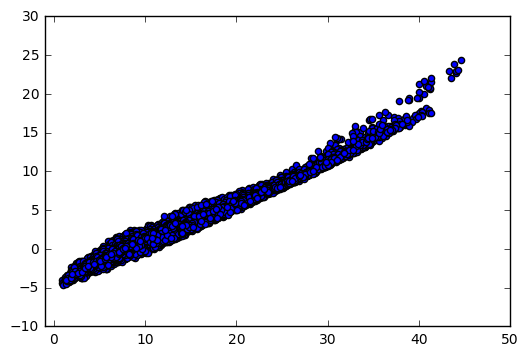

In [93]:
plt.scatter(probabilities, predictions)
plt.xlim((-1, 50))

In [94]:
predictions = predictions.reshape(len(predictions), 1)

In [95]:
probabilities = probabilities.reshape(len(probabilities), 1)

In [96]:
pred_act = np.hstack((predictions, probabilities))

In [97]:
df = pd.DataFrame(data=pred_act, columns=['prediction', 'probabilities'])

In [100]:
df

,prediction,probabilities
0,4.035583,13.356
1,4.809928,15.974
2,2.286686,10.576
3,2.506230,11.196
4,2.635463,11.386
5,2.371965,10.664
6,1.970630,9.586
7,3.418874,13.246
8,3.994666,13.880
9,3.023887,12.070


In [51]:
actually_delayed = df.ix[df['actual'] >= 15, :]

In [57]:
not_delayed = df.ix[df['actual'] < 15, :]

In [52]:
actually_delayed.ix[actually_delayed['prediction'] >= 15, :]

,prediction,actual
1,15.567,23.0
37,19.062,23.0
75,35.156,47.0
85,29.785,38.0
89,41.277,26.0
92,25.979,65.0
94,25.232,129.0
102,34.720,15.0
104,30.881,49.0
105,33.755,85.0


In [55]:
actually_delayed.mean()

prediction    19.479021
actual        50.658514
dtype: float64

In [58]:
not_delayed.mean()

prediction    14.582804
actual        -2.632717
dtype: float64

In [98]:
df.mean()

prediction        3.648151
probabilities    15.078636
dtype: float64

In [54]:
# Recall
696 / 1104.0

0.6304347826086957

In [48]:
predicted_delayed = df.ix[df['prediction'] >= 15, :]

In [49]:
predicted_delayed.ix[predicted_delayed['actual'] >= 15, :]

,prediction,actual
1,15.567,23.0
37,19.062,23.0
75,35.156,47.0
85,29.785,38.0
89,41.277,26.0
92,25.979,65.0
94,25.232,129.0
102,34.720,15.0
104,30.881,49.0
105,33.755,85.0


In [50]:
predicted_delayed

,prediction,actual
1,15.567,23.0
30,17.897,-6.0
31,20.816,-5.0
32,15.368,-1.0
33,16.337,-6.0
34,15.294,-3.0
36,17.997,-3.0
37,19.062,23.0
38,17.165,-1.0
39,16.508,-3.0


In [47]:
696 / 6094.0

0.11421069904824417

In [59]:
ls

collate_2008_on_csvs.py           modelrunner.py
combine_all_csvs.py               modelrunner.pyc
data_pc_lim_to_seatac.py          process_data_2008_on.py
dataframe_cleaner.py              scrape_transtats_airport_info.py
download_data_2008_on.py          sep2016_actuals.pkl
first_logistic_model.ipynb        sep2016_predictions.pkl
fsm_data_prep.py                  test_validation.ipynb
model_validation.py


In [67]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10952 entries, 0 to 10951
Data columns (total 32 columns):
Unnamed: 0           10952 non-null int64
index                10952 non-null int64
Year                 10952 non-null int64
Month                10952 non-null int64
DayofMonth           10952 non-null int64
DayOfWeek            10952 non-null int64
UniqueCarrier        10952 non-null object
TailNum              10952 non-null object
FlightNum            10952 non-null int64
Origin               10952 non-null object
Dest                 10952 non-null object
CRSDepTime           10952 non-null int64
DepTime              10952 non-null float64
DepDelay             10952 non-null float64
TaxiOut              10952 non-null float64
TaxiIn               10952 non-null float64
CRSArrTime           10952 non-null int64
ArrTime              10952 non-null float64
ArrDelay             10952 non-null float64
Cancelled            10952 non-null float64
CancellationCode     0 non-null f

In [99]:
alldata = pd.concat((df, df_actual), axis=1)

In [101]:
pred_pcts = alldata.groupby('carrier_o_d').mean()['probabilities']

In [102]:
df_actual['carrier_o_d'] = df_actual['Origin'] + df_actual['Dest'] + df_actual['UniqueCarrier']

In [103]:
counts = df_actual.groupby('carrier_o_d').count()[['Distance', 'CarrierDelay']]

In [104]:
actual_pct = counts['CarrierDelay'] / counts['Distance'] * 100

In [105]:
(pred_pcts - actual_pct).mean()

3.371333381814359

In [107]:
alldata[['prediction', 'probabilities', 'DepDelay']]

,prediction,probabilities,DepDelay
0,4.035583,13.356,-8.0
1,4.809928,15.974,23.0
2,2.286686,10.576,-8.0
3,2.506230,11.196,-4.0
4,2.635463,11.386,-6.0
5,2.371965,10.664,-3.0
6,1.970630,9.586,-2.0
7,3.418874,13.246,1.0
8,3.994666,13.880,7.0
9,3.023887,12.070,-2.0


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [137]:
poly = PolynomialFeatures(5)

In [109]:
lr = LinearRegression()

In [110]:
X = alldata[['prediction', 'probabilities']]
y = alldata['DepDelay']

In [138]:
X_2 = poly.fit_transform(X)

In [120]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
lr.coef_

array([ 0.82054964,  0.04336112])

In [115]:
lr.score(X, y)

0.027368086023535129

In [139]:
lr2 = LinearRegression()

In [140]:
lr2.fit(X_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
lr2.coef_

array([  0.00000000e+00,   1.83750126e+02,  -8.11603872e+01,
         9.81238983e+01,  -9.05422486e+01,   2.01269420e+01,
         2.44753138e+01,  -3.56828712e+01,   1.67953816e+01,
        -2.53743134e+00,   2.76647277e+00,  -5.70478179e+00,
         4.29342566e+00,  -1.39332786e+00,   1.63780033e-01,
         1.09379205e-01,  -3.04027958e-01,   3.28166171e-01,
        -1.72104644e-01,   4.38341606e-02,  -4.33011724e-03])

In [142]:
lr2.score(X_2, y)

0.029506186256705091

In [143]:
lr2.predict(X_2)

array([  1.51959747,   2.89413098,   0.63433092, ...,   9.13520501,
         5.61776268,  13.00320975])

In [144]:
better_predict = lr2.predict(X_2)

In [145]:
better_predict = pd.Series(better_predict)

In [149]:
better_predict.name = 'predictions_2'

In [152]:
alldata = pd.concat((alldata, better_predict), axis=1)

In [174]:
alldata_cut = alldata.ix[alldata['probabilities'] >= 15, :]

(-10, 200)

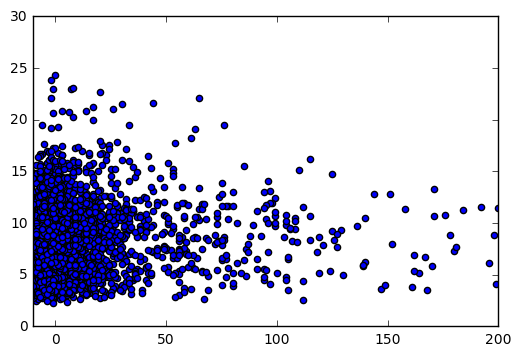

In [176]:
plt.scatter(alldata_cut[['DepDelay']], alldata_cut[['prediction']])
plt.xlim((-10, 200))

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
mean_squared_error(alldata_cut[['DepDelay']], alldata_cut[['predictions_2']])

344.86378744061045

In [178]:
delayed = alldata.ix[alldata['DepDelay'] >= 15, :]

In [179]:
not_delayed = alldata.ix[alldata['DepDelay'] < 15, :]

In [192]:
delayed.ix[delayed['probabilities'] >= 12, :]

,prediction,probabilities,Unnamed: 0,index,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,...,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,carrier_o_d,predictions_2
1,4.809928,15.974,1,1,2016,9,2,5,AA,N3KNAA,...,319.0,282.0,2422.0,15.0,0.0,0.0,0.0,0.0,SEAJFKAA,2.894131
17,3.416869,12.840,17,17,2016,9,18,7,AA,N3DFAA,...,292.0,261.0,2422.0,NaN,NaN,NaN,NaN,NaN,SEAJFKAA,1.427819
37,5.244178,19.102,37,89,2016,9,9,5,AA,N882AA,...,232.0,192.0,1660.0,19.0,0.0,0.0,0.0,0.0,SEADFWAA,4.903724
53,2.420347,14.008,53,105,2016,9,25,7,AA,N891AA,...,254.0,204.0,1660.0,57.0,0.0,18.0,0.0,0.0,SEADFWAA,2.167322
75,14.405066,35.314,75,194,2016,9,18,7,AA,N3HRAA,...,211.0,184.0,1721.0,2.0,0.0,0.0,0.0,24.0,SEAORDAA,12.988196
85,10.745607,30.010,85,204,2016,9,28,3,AA,N3HMAA,...,256.0,211.0,1721.0,38.0,0.0,24.0,0.0,0.0,SEAORDAA,7.400941
89,21.066596,40.760,89,238,2016,9,2,5,AA,N022AA,...,173.0,135.0,954.0,2.0,0.0,0.0,0.0,24.0,SEALAXAA,15.169693
92,10.270107,26.094,92,241,2016,9,5,1,AA,N860AA,...,128.0,110.0,954.0,0.0,0.0,0.0,0.0,20.0,SEALAXAA,5.092497
94,9.301669,25.372,94,243,2016,9,7,3,AA,N024AA,...,140.0,114.0,954.0,0.0,0.0,0.0,0.0,96.0,SEALAXAA,7.511916
102,16.587795,34.534,102,251,2016,9,15,4,AA,N023AA,...,152.0,121.0,954.0,NaN,NaN,NaN,NaN,NaN,SEALAXAA,7.992934


In [193]:
delayed.ix[delayed['probabilities'] < 12, :]

,prediction,probabilities,Unnamed: 0,index,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,...,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,carrier_o_d,predictions_2
474,0.681198,9.062,474,985,2016,9,5,1,AA,N195UW,...,153.0,137.0,1107.0,NaN,NaN,NaN,NaN,NaN,SEAPHXAA,0.366181
548,-0.736553,6.578,548,1099,2016,9,8,4,AA,N923US,...,149.0,128.0,1107.0,52.0,0.0,0.0,0.0,0.0,SEAPHXAA,-1.314427
660,1.575821,10.818,660,1334,2016,9,23,5,AA,N560UW,...,157.0,129.0,1107.0,204.0,0.0,0.0,0.0,0.0,SEAPHXAA,1.442393
743,1.854650,9.754,743,1500,2016,9,1,4,AS,N703AS,...,140.0,123.0,909.0,47.0,0.0,0.0,0.0,0.0,SEAJNUAS,0.341850
815,-1.295539,4.330,815,1644,2016,9,4,7,AS,N568AS,...,163.0,137.0,1050.0,69.0,0.0,4.0,0.0,0.0,SEASANAS,-1.760898
828,-1.376403,4.710,828,1667,2016,9,4,7,AS,N519AS,...,121.0,91.0,672.0,0.0,0.0,54.0,0.0,0.0,SEAOAKAS,-2.021223
834,-0.764017,7.978,834,1678,2016,9,4,7,AS,N461AS,...,100.0,80.0,605.0,0.0,0.0,0.0,0.0,15.0,SEASMFAS,-0.959662
844,1.016675,10.332,844,1696,2016,9,4,7,AS,N549AS,...,144.0,120.0,954.0,28.0,0.0,0.0,0.0,0.0,SEALAXAS,1.122628
906,2.316832,10.330,906,1815,2016,9,4,7,AS,N513AS,...,332.0,302.0,2496.0,0.0,0.0,17.0,0.0,21.0,SEABOSAS,0.578461
917,-1.579791,4.890,917,1833,2016,9,4,7,AS,N494AS,...,270.0,249.0,2086.0,23.0,0.0,0.0,0.0,0.0,SEAMSYAS,-2.394417


In [195]:
821 / 1104.0

0.7436594202898551

In [196]:
airlines = ['Alaska', 'Virgin America', 'SkyWest']
delaypct = [23.5, 27.0, 32.1]

In [214]:
from pylab import *
import seaborn as sns

In [218]:
plt.style.use('fivethirtyeight')

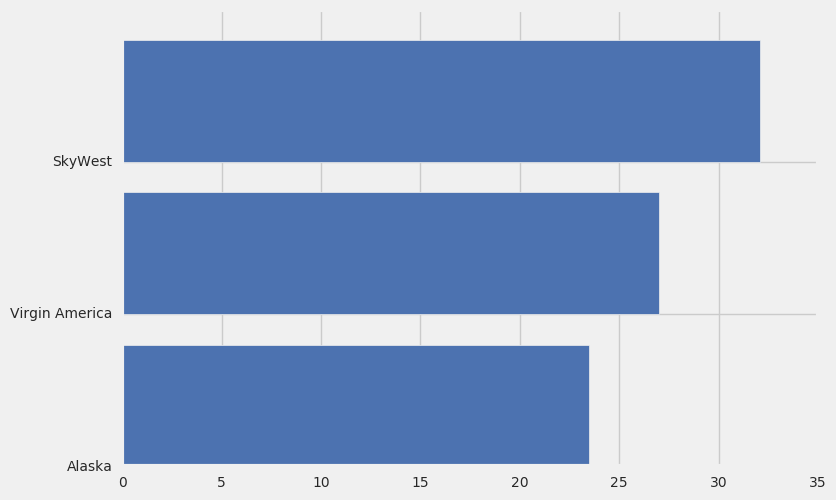

In [219]:
fig, ax = plt.subplots()

bar_locations = np.arange(3)
ax.barh(bar_locations, delaypct)
plt.yticks(bar_locations,(airlines))
fig.show()

In [202]:
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5])